<a href="https://colab.research.google.com/github/JonatasLemos/DataAnalysisProjects/blob/main/closestCapitalAnalysis/ClosestCapital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Closest Capital Analysis 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading csv,adding STATE column and creating DF with state capitals

In [ ]:
distance_cities = pd.read_csv("/content/drive/MyDrive/Colab Data/closest_capital.csv")

In [ ]:
distance_cities["STATE"]  = distance_cities["NAME"].str.split("/").apply(lambda x:x[-1])
distance_cities.head()

,NAME,NEAR_FID,NEAR_DIST,STATE
0,Aracaju/SE,1,1.279808e-10,SE
1,Belém/PA,2,1.580439e-10,PA
2,Belo Horizonte/MG,3,5.696375e-10,MG
3,Boa Vista/RR,4,3.281908e-10,RR
4,Brasília/DF,5,4.157356e-10,DF


In [ ]:
capitals = distance_cities[distance_cities.index < 27]
capitals.set_index("NEAR_FID",inplace=True)
capitals.head()

,NAME,NEAR_DIST,STATE
NEAR_FID,,,
1,Aracaju/SE,1.279808e-10,SE
2,Belém/PA,1.580439e-10,PA
3,Belo Horizonte/MG,5.696375e-10,MG
4,Boa Vista/RR,3.281908e-10,RR
5,Brasília/DF,4.157356e-10,DF


## Getting the most isolated cities in Brazil

In [ ]:
def get_index(near_fid):
  select = capitals.index == near_fid
  return capitals[select]["NAME"].to_numpy()[0]
distance_cities["CLOSEST_CAPITAL"] = distance_cities["NEAR_FID"].apply(get_index)

In [ ]:
distance_cities["CLOSEST_CAPITAL_STATE"] = distance_cities["CLOSEST_CAPITAL"].str.split("/").apply(lambda x:x[1])
distance_cities.to_csv("/content/drive/MyDrive/Colab Data/distance_cities.csv",index=False)
distance_cities.rename(columns={"NEAR_DIST": "DISTANCE"},inplace=True)
distance_cities.head()

,NAME,NEAR_FID,DISTANCE,STATE,CLOSEST_CAPITAL,CLOSEST_CAPITAL_STATE
0,Aracaju/SE,1,1.279808e-10,SE,Aracaju/SE,SE
1,Belém/PA,2,1.580439e-10,PA,Belém/PA,PA
2,Belo Horizonte/MG,3,5.696375e-10,MG,Belo Horizonte/MG,MG
3,Boa Vista/RR,4,3.281908e-10,RR,Boa Vista/RR,RR
4,Brasília/DF,5,4.157356e-10,DF,Brasília/DF,DF


In [ ]:
distance_cities.sort_values(by="DISTANCE",ascending=False,inplace=True)
print("MOST ISOLATED CITIES IN BRAZIL")
distance_cities[["NAME","DISTANCE","CLOSEST_CAPITAL"]].head(5)

MOST ISOLATED CITIES IN BRAZIL


,NAME,DISTANCE,CLOSEST_CAPITAL
5249,Tonantins/AM,7.062,Porto Velho/RO
4655,São Gabriel da Cachoeira/AM,7.062,Boa Vista/RR
4549,Santo Antônio do Içá/AM,6.874,Rio Branco/AC
2538,Japurá/AM,6.697,Manaus/AM
4848,São Paulo de Olivença/AM,6.682,Rio Branco/AC


In [ ]:
df_isolated_cities = pd.DataFrame(columns=["NAME","DISTANCE","CLOSEST_CAPITAL"])
df_most_isolated = pd.DataFrame(columns=["NAME","DISTANCE","CLOSEST_CAPITAL"])
for i in capitals["STATE"]:
  select = distance_cities["STATE"] == i
  df_most_isolated = df_most_isolated.append(distance_cities[select][["NAME","DISTANCE","CLOSEST_CAPITAL"]].head(1))
  df_isolated_cities = df_isolated_cities.append(distance_cities[select][["NAME","STATE","DISTANCE","CLOSEST_CAPITAL"]].head(10))
df_isolated_cities.to_csv("/content/drive/MyDrive/Colab Data/isolated_10.csv",index=False)
df_most_isolated.sort_values(by="DISTANCE",inplace=True,ascending=False)
pd.set_option('display.float_format', '{:.3f}'.format)
print("MOST ISOLATED CITIES PER STATE")
df_most_isolated.head(10)

MOST ISOLATED CITIES PER STATE


,NAME,DISTANCE,CLOSEST_CAPITAL
5249,Tonantins/AM,7.062,Porto Velho/RO
549,Barra do Quaraí/RS,6.327,Porto Alegre/RS
303,Apiacás/MT,6.201,Cuiabá/MT
3418,Novo Progresso/PA,6.158,Manaus/AM
2890,Mâncio Lima/AC,5.607,Rio Branco/AC
3791,Pimenteiras do Oeste/RO,5.382,Cuiabá/MT
3223,Muquém de São Francisco/BA,5.119,Salvador/BA
1850,Foz do Iguaçu/PR,5.105,Campo Grande/MS
2884,Mamonas/MG,4.872,Belo Horizonte/MG
3187,Morro Cabeça no Tempo/PI,4.454,Palmas/TO


## Grouping DF by STATE and CLOSEST_CAPITAL and aggregating using size

In [ ]:
grouped_states = distance_cities.groupby(["STATE","CLOSEST_CAPITAL"]).agg("size").to_frame()
grouped_states = grouped_states.rename(columns={0: "NUMBER_OF_CITIES"})
grouped_states = grouped_states.sort_values('NUMBER_OF_CITIES', ascending=False).sort_index(level='STATE', sort_remaining=False)
grouped_states.to_csv("grouped_states.csv")
grouped_states

NUMBER_OF_CITIES
STATE CLOSEST_CAPITAL                    
AC    Rio Branco/AC                    22
AL    Maceió/AL                        73
      Aracaju/SE                       29
AM    Manaus/AM                        39
      Rio Branco/AC                    13
...                                   ...
SP    Rio de Janeiro/RJ                 9
      Belo Horizonte/MG                 1
TO    Palmas/TO                       124
      Belém/PA                         12
      Brasília/DF                       3

[83 rows x 1 columns]

## Getting the number of cities closer to each capital

In [ ]:
nationwide_influence = distance_cities.groupby(["CLOSEST_CAPITAL"]).agg("size")
nationwide_influence.sort_values(ascending=False).head(5)

CLOSEST_CAPITAL
Porto Alegre/RS      585
Curitiba/PR          489
São Paulo/SP         486
Belo Horizonte/MG    461
Salvador/BA          344
dtype: int64

In [ ]:
selection = distance_cities["STATE"]==distance_cities["CLOSEST_CAPITAL_STATE"]
in_state_cites = distance_cities[selection]
in_state_cites.tail(5)

,NAME,NEAR_FID,DISTANCE,STATE,CLOSEST_CAPITAL,CLOSEST_CAPITAL_STATE
1,Belém/PA,2,0.000,PA,Belém/PA,PA
26,Vitória/ES,27,0.000,ES,Vitória/ES,ES
0,Aracaju/SE,1,0.000,SE,Aracaju/SE,SE
20,Rio Branco/AC,21,0.000,AC,Rio Branco/AC,AC
23,São Luís/MA,24,0.000,MA,São Luís/MA,MA


In [ ]:
statewide_influence = in_state_cites.groupby(["CLOSEST_CAPITAL"]).agg("size")
statewide_influence.sort_values(ascending=False).head(5)

CLOSEST_CAPITAL
Porto Alegre/RS      497
Belo Horizonte/MG    460
São Paulo/SP         385
Salvador/BA          325
Curitiba/PR          306
dtype: int64

In [ ]:
df_series = pd.DataFrame({'NATIONWIDE_COUNT': nationwide_influence,'STATEWIDE_COUNT': statewide_influence})
df_series.reset_index(level=0, inplace=True)
df_series["STATE"] = df_series["CLOSEST_CAPITAL"].str.split("/").apply(lambda x:x[1])

## Getting the number of cities within the state which are closer to its capital

In [ ]:
n_of_cities_per_state = distance_cities.groupby(["STATE"]).agg("size")
df_states = pd.DataFrame({'NUMBER_OF_CITIES_PER_STATE':n_of_cities_per_state})
df_states.reset_index(level=0, inplace=True)

In [ ]:
df_series = df_series.merge(df_states)
df_series.head()

,CLOSEST_CAPITAL,NATIONWIDE_COUNT,STATEWIDE_COUNT,STATE,NUMBER_OF_CITIES_PER_STATE
0,Aracaju/SE,173,75,SE,75
1,Belo Horizonte/MG,461,460,MG,853
2,Belém/PA,111,89,PA,143
3,Boa Vista/RR,17,15,RR,15
4,Brasília/DF,128,1,DF,1


In [ ]:
# STATEWIDE INFLUENCE
df_series["% INFLUENCE_STATEWIDE"] = np.round((df_series["STATEWIDE_COUNT"]/df_series["NUMBER_OF_CITIES_PER_STATE"])*100,1)
# NATIONWIDE INFLUENCE
total_cities_brazil = df_series["NUMBER_OF_CITIES_PER_STATE"].sum()
df_series["% INFLUENCE_NATIONWIDE"] = np.round((df_series["NATIONWIDE_COUNT"]/total_cities_brazil)*100,1)
columns = ["CLOSEST_CAPITAL","NUMBER_OF_CITIES_PER_STATE","NATIONWIDE_COUNT",
           "STATEWIDE_COUNT","% INFLUENCE_NATIONWIDE","% INFLUENCE_STATEWIDE"]
df_display = df_series.reindex(columns=columns)
df_display.head()

,CLOSEST_CAPITAL,NUMBER_OF_CITIES_PER_STATE,NATIONWIDE_COUNT,STATEWIDE_COUNT,% INFLUENCE_NATIONWIDE,% INFLUENCE_STATEWIDE
0,Aracaju/SE,75,173,75,3.100,100.000
1,Belo Horizonte/MG,853,461,460,8.300,53.900
2,Belém/PA,143,111,89,2.000,62.200
3,Boa Vista/RR,15,17,15,0.300,100.000
4,Brasília/DF,1,128,1,2.300,100.000


## Capitals with 100% of influence statewide

In [ ]:
select = df_series["% INFLUENCE_STATEWIDE"] == 100.0
df_series[select]["CLOSEST_CAPITAL"].to_frame()

,CLOSEST_CAPITAL
0,Aracaju/SE
3,Boa Vista/RR
4,Brasília/DF
12,Macapá/AP
17,Porto Alegre/RS
20,Rio Branco/AC
26,Vitória/ES


## Ploting

In [ ]:
title_font = 20
label_font = 14
plt.rcParams["figure.figsize"] = [9, 6]

In [ ]:
def plot_bar(*args):
  plt.barh(args[0],args[1])
  plt.suptitle(f'ZONA DE INFLUÊNCIA {args[2]}', fontsize=title_font)
  plt.title(f'Capitais com {args[3]} municípios em sua zona de influência',fontsize=label_font)
  plt.xlabel(f'% das cidades do {args[4]}',fontsize=label_font)
  plt.ylabel('Capital',fontsize=label_font)
  plt.xticks(fontsize=label_font)
  plt.yticks(fontsize=label_font)
  plt.grid(lw="0.2")
  plt.show()

In [ ]:
df_series.sort_values(by="% INFLUENCE_STATEWIDE",inplace=True,ascending=False)
df_last_10 = df_series.tail(7)

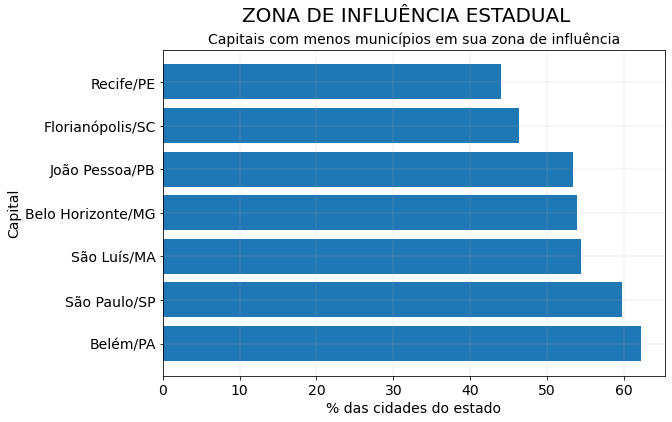

In [ ]:
plot_bar(df_last_10["CLOSEST_CAPITAL"],df_last_10["% INFLUENCE_STATEWIDE"],"ESTADUAL","menos","estado")

In [ ]:
df_series.sort_values(by="% INFLUENCE_NATIONWIDE",inplace=True,ascending=True)
df_series_10 = df_series.tail(7)

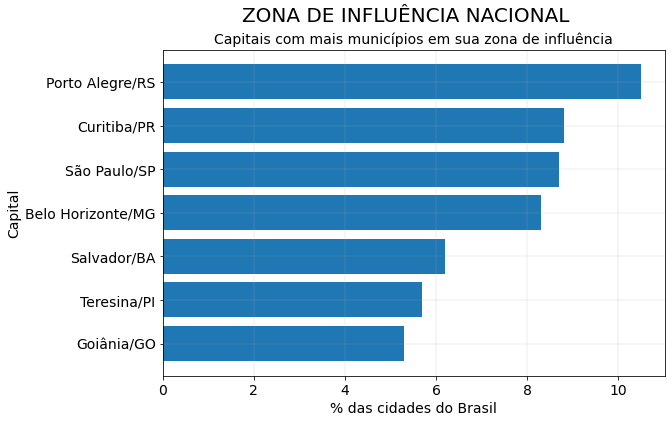

In [ ]:
plot_bar(df_series_10["CLOSEST_CAPITAL"],df_series_10["% INFLUENCE_NATIONWIDE"],"NACIONAL","mais","Brasil")